# Plot results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import visualize as vis
from util import load_params, npload
from plot import plot_time_series

data_dir = "data/case1/r0"

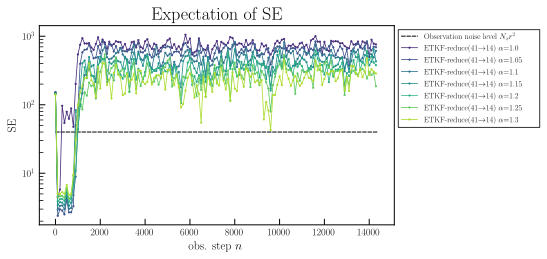

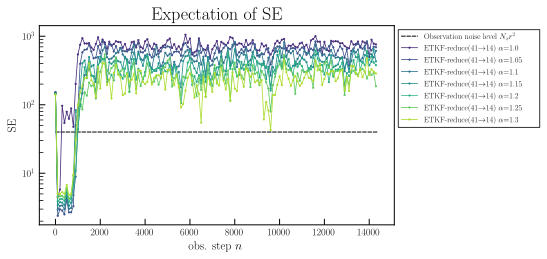

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
plot_time_series(
    data_dir=data_dir,
    target_m_list=[14],
    target_alpha_list=None,
    plot_type="mean",
    plot_metric="SE",
    plot_ylabel=True,
    plot_legend=True,
    ax=ax,
    title="Expectation of SE",
    plot_per=100,
)
fig.tight_layout()
# if data_dir == "data/case4/r0-t3":
#     fig.savefig("figures/fig7-1.pdf", transparent=True)
    
fig

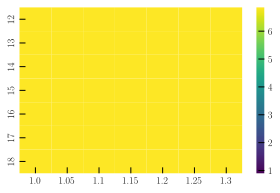

In [3]:
import seaborn as sns
sup_se = pd.read_csv(f"{data_dir}/sup_se.csv", index_col=0, header=0)
if data_dir == "data/case4/r0-t3":    
    sup_rmse = pd.read_csv(f"{data_dir}/sup_rmse.csv", index_col=0, header=0)
    metric = pd.concat([np.sqrt(sup_se/ 40), sup_rmse])
    metric.index = ["SE", "RMSE"]
    sns.heatmap(metric, annot=True, fmt=".2f", vmax=1.0, cmap="viridis")
else:
    sns.heatmap(sup_se, vmax=1.0, cmap="viridis")


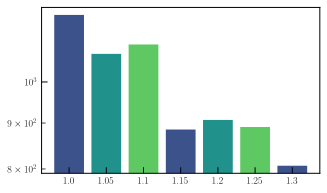

In [4]:
colors = vis.get_color_palette(3, "viridis")
plt.bar(sup_se.columns, sup_se.values[0], color=colors)
# plt.plot(sup_se.columns, 40*np.ones_like(sup_se.columns), color="black", ls="dashed")
plt.yscale("log")
# plt.ylim([0.1, 150])

In [5]:
# -- Load data --
set_params = load_params(data_dir)
N_spinup = set_params.N_spinup
dt = set_params.dt
obs_per = set_params.obs_per
x_true = npload(f"{data_dir}/x_true_l96.npy")[N_spinup:]  # (T, 3)
i_numens = 0
j_alpha = 3
k_seed = 0
x_esti = npload(f"{data_dir}/xa-{i_numens}{j_alpha}{k_seed}.npy")

n_start = 500
n_stride = 1
n_end = n_start + 100*n_stride


# -- Print params --
print(f"m: {set_params.m_reduced_list[i_numens]}, alpha: {set_params.alpha_list[j_alpha]}, seed: {k_seed}")

# --- Run Animation ---
# This will save 'enkf_output.mp4' and display it in the notebook
from plot import animate_enkf_pyvista
video = animate_enkf_pyvista(
    x_true[n_start:n_end:n_stride, :3],
    x_esti[n_start:n_end:n_stride, :, :3],
    obs=None, filename=f"{data_dir}/enkf_output_{i_numens}{j_alpha}{k_seed}.mp4",
    tail_len=30,
    ax_labels=('x1', 'x2', 'x3'),
    colors={'true': 'teal', 'mean': 'orange', 'ens': 'orange'},
    t_info={"t_start": n_start * dt * obs_per, "dt": dt * obs_per}
)
display(video)

m: 12, alpha: 1.15, seed: 0
Processing animation: data/case1/r0/enkf_output_030.mp4 ...
Animation saved.
